CHAPTER 1:
# Characteristics of Little Penguin Nests on Penguin Island

### OVERVIEW OF CHAPTER:

This chapter will describe attributes of sites being used by penguins for nesting/ breeding on Penguin Island and compare with sites that are not used. Both natural burrows and artificial nests will be described. The objective is to determine whether nest site selection is random or if certain environmental cues influence penguins' choice of a nest site, or the probability of a site being utilised for breeding activity.

### USAGE DEFINITIONS:

**Used**: Nests/site where nesting or breeding activity has been observed during the analysed period (entire study/ per year).

**Unused**: No evidence of nesting or breeding activity observed during the analysed period (entire study/ per year)

**Breeding**: at least one egg has been laid in the nest during the analysed period

**Non-breeding**: nesting activity was observed but breeding (egg lay) was not initiated during the analysed period.

### QUESTIONS:

1. What are the physical attributes of little penguin nests? (i.e. what do little penguin nests look like? cavity size, aspect, entrance orientation, entrance length etc.)
2. Nest selection is not random and little penguins use environmental cues to "choose" a nesting location. Therefore, do nest attributes differ between 'used' and 'unused' sites?
3. Is the probability of a 'chosen' nest site then being utilised for breeding influenced by certain nest attributes?

In [1]:
# imports
import pandas as pd
import os
import numpy as np
# import datetime
# import time
import sys

# from bokeh.io import output_notebook, show
# from bokeh.charts import Scatter, Bar, Histogram, BoxPlot
# our own package helper functions
import helper_functions as h

In [2]:
if os.path.isfile(os.path.normpath('./output/A_load_and_combine_data/df_nest_static.pkl')):
    h.log('Loading nest masterdata from pickle...')
    df_nest_static = pd.read_pickle(os.path.normpath('./output/A_load_and_combine_data/df_nest_static.pkl'))
    h.log('Done.')
else:
    h.log('Cannot find the nest static file. Exiting.')
    sys.exit(0)

Sat Feb  4 18:47:35 2017 - Loading nest masterdata from pickle...
Sat Feb  4 18:47:35 2017 - Done.


In [3]:
df_nest_static.columns

Index(['nest_id', 'nest_type', 'distance_to_boardwalk_m',
       'distance_to_vegetation_m', 'distance_to_landfall', 'entrance_bearing',
       'box_height_mm', 'box_length_mm', 'box_width_mm', 'box_wall_width_mm',
       'box_lid_depth', 'internal_height_mm', 'internal_width_mm',
       'internal_length_mm', 'entrance_height', 'entrance_width',
       'entrance_length', 'vents', 'box_vol_L', 'box_area_cm2',
       'box_has_tunnel', 'shape', 'elevation', 'easting', 'northing', 'aspect',
       'slope', 'duration_of_insolation', 'comment'],
      dtype='object')

### Box Characteristics: Volume
Only boxes have volumes. Natural nests and control sites do not.

In [4]:
df_vol = df_nest_static[['nest_type', 'box_vol_L']].copy()
len_with_NaNs = len(df_vol)
df_vol.dropna(inplace=True)
Num_NaNs = len_with_NaNs - len(df_vol)
df_vol['box_vol_L'] = df_vol['box_vol_L'].apply(lambda x: round(x))
df_vol['counter'] = 1
gb_vol = df_vol.groupby(['nest_type', 'box_vol_L']).agg('count')
gb_vol = gb_vol.reset_index()

gb_vol

,nest_type,box_vol_L,counter
0,BOX,38,4
1,BOX,41,1
2,BOX,42,1
3,BOX,45,2
4,BOX,46,2
5,BOX,47,2
6,BOX,48,7
7,BOX,49,3
8,BOX,50,5
9,BOX,51,3


## In Altair

In [5]:
from altair import Chart, Bin, X, Y, Axis, Color

c = Chart(data=df_vol).mark_bar(opacity=0.5).encode(
    x=X('box_vol_L', 
        bin=Bin(base=1.0, step=1.0),
        axis=Axis(title='Volumne of Nesting Box (L)')),
    y=Y('count(*)',
       axis=Axis(title='Number of Boxes')),
    color=Color('nest_type')
)

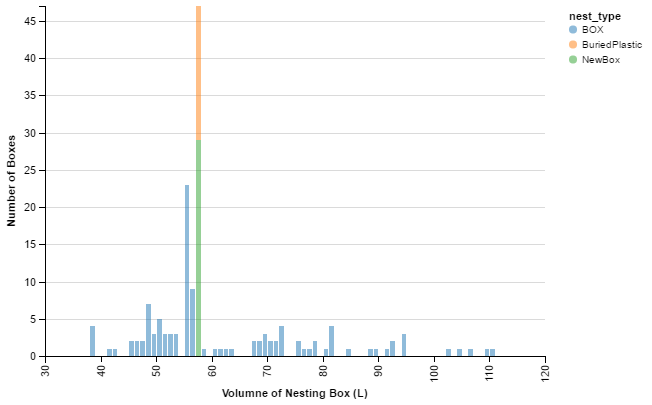

In [6]:
c

## In Bokeh

In [7]:
from bokeh.io import output_notebook, show
from bokeh.charts import Scatter, Bar, Histogram, BoxPlot
output_notebook()

Loading BokehJS ...

### As Bokeh.Chats.Histogram
The bars do not line up to the axis and I can't figure out how to get the tooltip to show the box_vol_L (x axis position (as data not screen)). Not showing the other categories.

In [37]:
df = df_nest_static[['nest_type', 'box_vol_L']].copy()
len_with_NaNs = len(df)
df.dropna(inplace=True)
Num_NaNs = len_with_NaNs - len(df)
df['box_vol_L'] = df['box_vol_L'].apply(lambda x: round(x))
# df_vol['counter'] = 1
# gb_vol = df_vol.groupby(['nest_type', 'box_vol_L']).agg('count')
# gb_vol = gb_vol.reset_index()
# gb_vol

tooltips=[
    ('Volume', '@x'),
    ('Count', '@height'),
    ('Nest Type', '@nest_type'),
]
hist = Histogram(data=df, 
                 values='box_vol_L', 
                 title='Nesting box volumes (Rounded to nearest L). {0} natural nests excluded.'.format(Num_NaNs),
#                  color='nest_type',
                 agg='count',
                 bins=df['box_vol_L'].max() - df['box_vol_L'].min() + 1,
                 tooltips=tooltips
                )
show(hist)

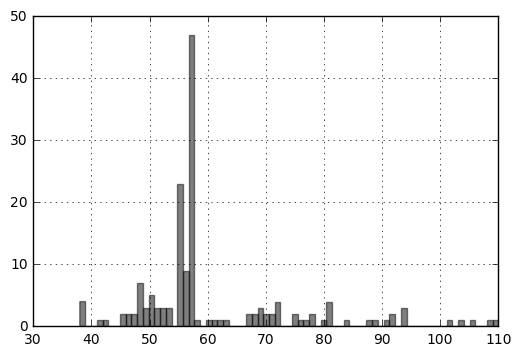

In [34]:
import matplotlib.pyplot as plt
df = df_nest_static[['nest_type', 'box_vol_L']].copy()
len_with_NaNs = len(df)
df.dropna(inplace=True)
Num_NaNs = len_with_NaNs - len(df)
df['box_vol_L'] = df['box_vol_L'].apply(lambda x: round(x))

# plt.figure()
df['box_vol_L'].hist(color='k', alpha=0.5, bins=(df['box_vol_L'].max() - df['box_vol_L'].min()+1))
plt.show()

In [36]:
a = df['box_vol_L'].max() - df['box_vol_L'].min() + 1
b = len(df)
print(a)
print(b)

73
160


## In MatPlotLib

In [22]:
import matplotlib.pyplot as plt

In [25]:
df = df_nest_static[['nest_type', 'box_vol_L']].copy()
len_with_NaNs = len(df)
df.dropna(inplace=True)
Num_NaNs = len_with_NaNs - len(df)
df['box_vol_L'] = df['box_vol_L'].apply(lambda x: round(x))
gb_vol = df.groupby(['nest_type', 'box_vol_L']).agg('count')
gb_vol = gb_vol.reset_index()
# gb_vol

plt.hist(df)

TypeError: len() of unsized object

### -----------------------------------------------
## Abandoned
### -----------------------------------------------